# Is this a fake job posting??!
## Downloading Data and Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
df=pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Data Preparation
this include dropping the unwanted columns, replacing the NaN values with a space, and merging all text data together in one column

In [3]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [4]:
missing_data=df.isnull()
missing_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,True,False,False,False,True,False,False,False,True,True,True,True,True,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

job_id
False    17880
Name: job_id, dtype: int64

title
False    17880
Name: title, dtype: int64

location
False    17534
True       346
Name: location, dtype: int64

department
True     11547
False     6333
Name: department, dtype: int64

salary_range
True     15012
False     2868
Name: salary_range, dtype: int64

company_profile
False    14572
True      3308
Name: company_profile, dtype: int64

description
False    17879
True         1
Name: description, dtype: int64

requirements
False    15185
True      2695
Name: requirements, dtype: int64

benefits
False    10670
True      7210
Name: benefits, dtype: int64

telecommuting
False    17880
Name: telecommuting, dtype: int64

has_company_logo
False    17880
Name: has_company_logo, dtype: int64

has_questions
False    17880
Name: has_questions, dtype: int64

employment_type
False    14409
True      3471
Name: employment_type, dtype: int64

required_experience
False    10830
True      7050
Name: required_experience, dtype: int64

require

In [6]:
df.drop(['salary_range'], axis=1, inplace=True)
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
df.fillna(" ",inplace = True)

In [8]:
df.shape

(17880, 17)

In [9]:
df['text_data']=df['title']+' '+df['location']+' '+df['department']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['employment_type']+' '+df['required_experience']+' '+df['required_education']+' '+df['industry']+' '+df['function']
df['text_data'].head().to_frame()

,text_data
0,"Marketing Intern US, NY, New York Marketing We..."
1,"Customer Service - Cloud Video Production NZ, ..."
2,"Commissioning Machinery Assistant (CMA) US, IA..."
3,"Account Executive - Washington DC US, DC, Wash..."
4,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [10]:
df.drop(["job_id", "title", "benefits", "location", "department", "company_profile", "description", "requirements", "employment_type", "required_experience", "required_education", "industry", "function"], axis=1, inplace=True)
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text_data
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [11]:
missing_data2=df.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")  

telecommuting
False    17880
Name: telecommuting, dtype: int64

has_company_logo
False    17880
Name: has_company_logo, dtype: int64

has_questions
False    17880
Name: has_questions, dtype: int64

fraudulent
False    17880
Name: fraudulent, dtype: int64

text_data
False    17880
Name: text_data, dtype: int64



## Data Visualization
trying to visualize the boolean attributes by counting them with the fraudulent to picture the correlation between both

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


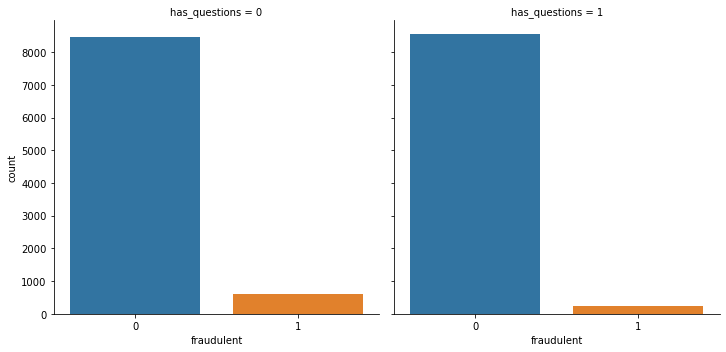

In [12]:
sns.factorplot(x='fraudulent', col='has_questions', kind='count', data=df)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


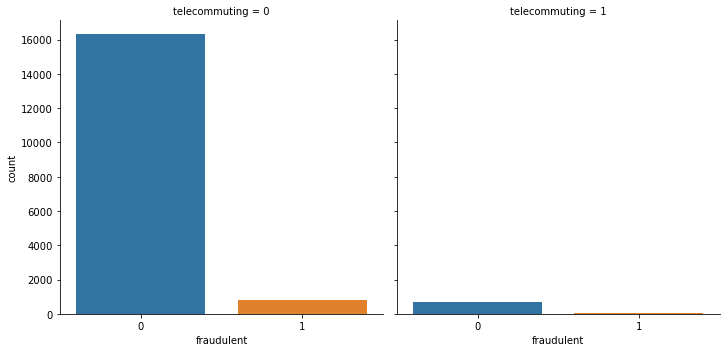

In [13]:
sns.factorplot(x='fraudulent', col='telecommuting', kind='count', data=df)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


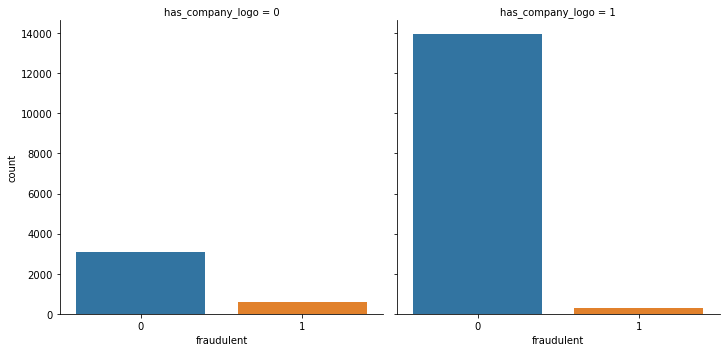

In [14]:
sns.factorplot(x='fraudulent', col='has_company_logo', kind='count', data=df)

## Model Development and Evaluation 
Using the Bag-of-words model to assign each word a unique number, then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count (CountVectorizer) or frequency (TfidfVectorizer) of each word in the encoded document.

In [15]:
x_data=df['text_data']
y_data=df['fraudulent']
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.15, random_state=0)
print('the shape of the x train data', x_train.shape)
print('the shape of the y train data', y_train.shape)
print('the shape of the x test data', x_test.shape)
print('the shape of the y test data', x_test.shape)

the shape of the x train data (15198,)
the shape of the y train data (15198,)
the shape of the x test data (2682,)
the shape of the y test data (2682,)


In [16]:
vectorizer1=CountVectorizer()
x_train_cv=vectorizer1.fit_transform(x_train)
x_test_cv=vectorizer1.transform(x_test)

vectorizer2=TfidfVectorizer()
x_train_tv=vectorizer2.fit_transform(x_train)
x_test_tv=vectorizer2.transform(x_test)

In [17]:
model=MultinomialNB()
model_cv=model.fit(x_train_cv, y_train)
yhat_cv=model.predict(x_test_cv)
model_tv=model.fit(x_train_tv, y_train)
yhat_tv=model.predict(x_test_tv)

In [18]:
print('count vectorizer accuracy is:', metrics.accuracy_score(y_test, yhat_cv))
print('Tfidf vectorizer accuracy is:', metrics.accuracy_score(y_test, yhat_tv))

count vectorizer accuracy is: 0.9783743475018642
Tfidf vectorizer accuracy is: 0.9589858314690529


In [21]:
print('the classification report for count vectorizer:')
print(metrics.classification_report(y_test, yhat_cv))

the classification report for count vectorizer:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2572
           1       0.81      0.62      0.70       110

   micro avg       0.98      0.98      0.98      2682
   macro avg       0.90      0.81      0.84      2682
weighted avg       0.98      0.98      0.98      2682



In [22]:
print('the classification report for Tfidf vectorizer:')
print(metrics.classification_report(y_test, yhat_tv))

the classification report for Tfidf vectorizer:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2572
           1       0.00      0.00      0.00       110

   micro avg       0.96      0.96      0.96      2682
   macro avg       0.48      0.50      0.49      2682
weighted avg       0.92      0.96      0.94      2682



## Conclusion 
the count vectorizer has higher accuracy of 97.8% and the Tfidf vectorizer with accuracy of 95.8%. The classification matrix for both tokenization techniques are above. 